数据探索与可视化
实验目标
·学习并掌握如何使用Python进行数据探索与可视化。
·理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
·使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
·利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。

实验要求
·使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。
·使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。 使用describe()方法生成数据的描述性统计信息。
·对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。
·对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。
·使用Matplotlib绘制图表
    绘制条形图：展示label列的类别分布。
    绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
    绘制直方图：展示log_public_repos的对数变换后的数据分布。
    绘制直方图：展示log_public_repos的对数变换后的数据分布。
    绘制散点图：展示public_repos与followers之间的关系。
    绘制散点矩阵：展示多个数值型特征之间的成对关系。
·使用Seaborn绘制图表
    绘制箱线图：展示不同label类别下log_followers的分布。
    绘制成对图：展示不同特征之间的成对关系，并根据label分类。
    绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
    绘制小提琴图：展示label与log_followers之间的分布差异。
·使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

1.使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。

In [1]:
import pandas as pd
import os
file_path = os.path.expanduser("~/Desktop/github_bot_processed_data.csv")

# 确保文件存在
if os.path.exists(file_path):
    # 读取数据
    data = pd.read_csv(file_path)

    # 显示数据基本信息
    print("数据集基本信息：")
    print(data.info())

    # 调整显示选项：设置最大行和列显示
    pd.set_option('display.max_rows', 100)  
    pd.set_option('display.max_columns', 20) 

    # 显示前几行
    print("\n数据集前几行:")
    print(data.head(10))  
else:
    print(f"文件未找到，请检查路径：{file_path}")


数据集基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19768 entries, 0 to 19767
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           19768 non-null  object
 1   type            19768 non-null  bool  
 2   site_admin      19768 non-null  bool  
 3   company         19768 non-null  bool  
 4   blog            19768 non-null  bool  
 5   location        19768 non-null  bool  
 6   hireable        19768 non-null  bool  
 7   bio             8839 non-null   object
 8   public_repos    19768 non-null  int64 
 9   public_gists    19768 non-null  int64 
 10  followers       19768 non-null  int64 
 11  following       19768 non-null  int64 
 12  created_at      19768 non-null  object
 13  updated_at      19768 non-null  object
 14  text_bot_count  19768 non-null  int64 
dtypes: bool(6), int64(5), object(4)
memory usage: 1.5+ MB
None

数据集前几行：
   label  type  site_admin  company   blog  location  hireabl

2.使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。 使用describe()方法生成数据的描述性统计信息。

In [2]:
import pandas as pd
import os

# 构造文件路径
file_path = os.path.expanduser("~/Desktop/github_bot_processed_data.csv")

# 确保文件存在
if os.path.exists(file_path):
    # 读取数据
    data = pd.read_csv(file_path)

    # 使用 head() 方法查看数据的前几行
    print("数据集前几行(head):")
    print(data.head())

    # 使用 info() 方法查看数据的基本信息
    print("\n数据集基本信息(info):")
    print(data.info())

    # 使用 describe() 方法生成描述性统计信息
    print("\n数据集描述性统计信息(describe):")
    print(data.describe())
else:
    print(f"文件未找到，请检查路径：{file_path}")


数据集前几行（head）：
   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9      

3.对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。

In [4]:
import pandas as pd

# 假设数据已经加载到 DataFrame
# 使用截图中的列名，调整以下代码

# 构造示例数据
data = {
    "label": ["Human", "Human", "Human", "Bot"],
    "created_at": ["2011-09-26", "2015-06-29", "2008-08-29", "2014-05-20"],
    "updated_at": ["2023-10-13", "2023-10-07", "2023-10-02", "2023-10-12"],
    "public_repos": [26, 30, 103, 49],
    "public_gists": [1, 3, 49, 0],
    "followers": [5, 9, 1212, 84],
    "bio": [
        "I just press ",
        "Time is unimportant, only life important.",
        "Done study",
        None
    ],
    "hireable": [False, True, True, False]
}

df = pd.DataFrame(data)

# 1. 格式化日期列
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['updated_at'] = pd.to_datetime(df['updated_at'], errors='coerce')
print("\n格式化后的日期列：")
print(df[['created_at', 'updated_at']].head())

# 2. 格式化数值列为货币
df['formatted_followers'] = df['followers'].apply(lambda x: f"${x:,.2f}")
print("\n格式化后的关注者数为货币格式：")
print(df[['followers', 'formatted_followers']].head())

# 3. 生成百分比格式（假设 followers 是百分比需要）
df['formatted_percentage'] = df['followers'].apply(lambda x: f"{(x / 100):.2%}")
print("\n格式化后的关注者数为百分比格式：")
print(df[['followers', 'formatted_percentage']].head())

# 4. 检查文本列（例如 bio）
print("\n用户简介信息：")
print(df['bio'].head())



格式化后的日期列：
  created_at updated_at
0 2011-09-26 2023-10-13
1 2015-06-29 2023-10-07
2 2008-08-29 2023-10-02
3 2014-05-20 2023-10-12

格式化后的关注者数为货币格式：
   followers formatted_followers
0          5               $5.00
1          9               $9.00
2       1212           $1,212.00
3         84              $84.00

格式化后的关注者数为百分比格式：
   followers formatted_percentage
0          5                5.00%
1          9                9.00%
2       1212             1212.00%
3         84               84.00%

用户简介信息：
0                                I just press 
1    Time is unimportant, only life important.
2                                   Done study
3                                         None
Name: bio, dtype: object


4.对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。

In [5]:
import pandas as pd
import numpy as np

# 示例数据
data = {
    "public_repos": [26, 30, 103, 49],
    "public_gists": [1, 3, 49, 0],
    "followers": [5, 9, 1212, 84],
    "following": [1, 6, 221, 2]
}

df = pd.DataFrame(data)

# 1. 对数据进行对数变换（处理值为0的情况，避免 log(0) 错误）
# 我们对数据加 1，以确保所有值都大于 0
df['log_public_repos'] = np.log1p(df['public_repos'])
df['log_public_gists'] = np.log1p(df['public_gists'])
df['log_followers'] = np.log1p(df['followers'])
df['log_following'] = np.log1p(df['following'])

# 2. 查看原始数据和对数变换后的数据
print("原始数据：")
print(df[['public_repos', 'public_gists', 'followers', 'following']])

print("\n对数变换后的数据：")
print(df[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']])


原始数据：
   public_repos  public_gists  followers  following
0            26             1          5          1
1            30             3          9          6
2           103            49       1212        221
3            49             0         84          2

对数变换后的数据：
   log_public_repos  log_public_gists  log_followers  log_following
0          3.295837          0.693147       1.791759       0.693147
1          3.433987          1.386294       2.302585       1.945910
2          4.644391          3.912023       7.100852       5.402677
3          3.912023          0.000000       4.442651       1.098612


5.使用Matplotlib绘制图表
    绘制条形图：展示label列的类别分布。
    绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
    绘制直方图：展示log_public_repos的对数变换后的数据分布。
    绘制直方图：展示log_public_repos的对数变换后的数据分布。
    绘制散点图：展示public_repos与followers之间的关系。
    绘制散点矩阵：展示多个数值型特征之间的成对关系。

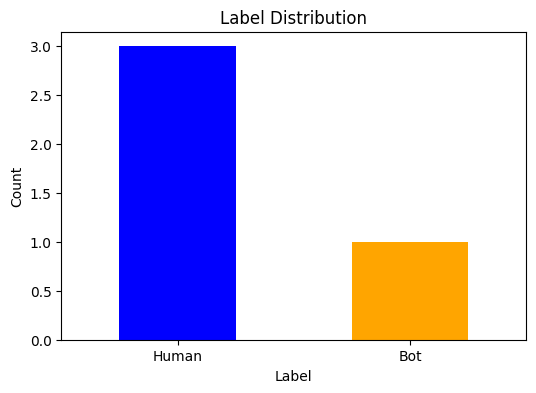

/var/folders/f2/pss60fws0n1cdzh4q9cclq_80000gn/T/ipykernel_97540/1532852193.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bool = df[bool_features].replace({True: 1, False: 0}).sum()


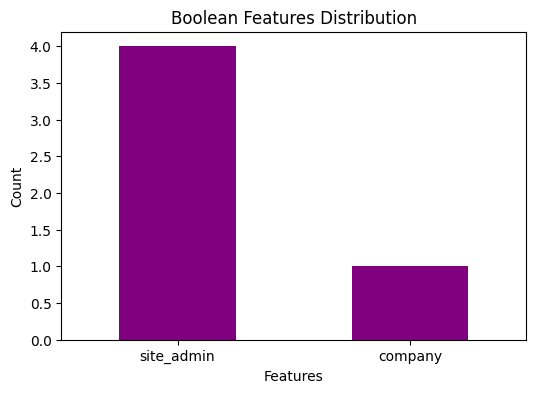

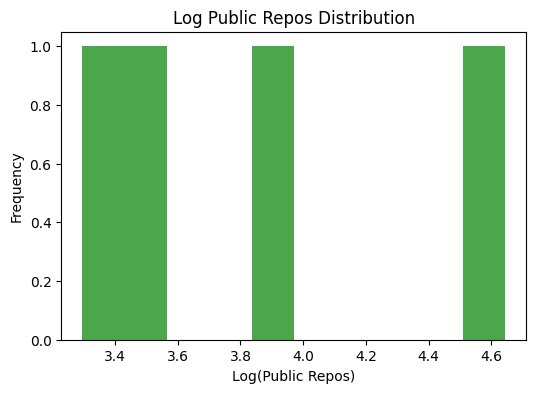

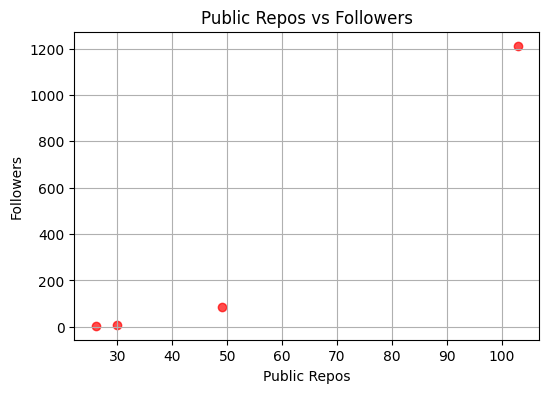

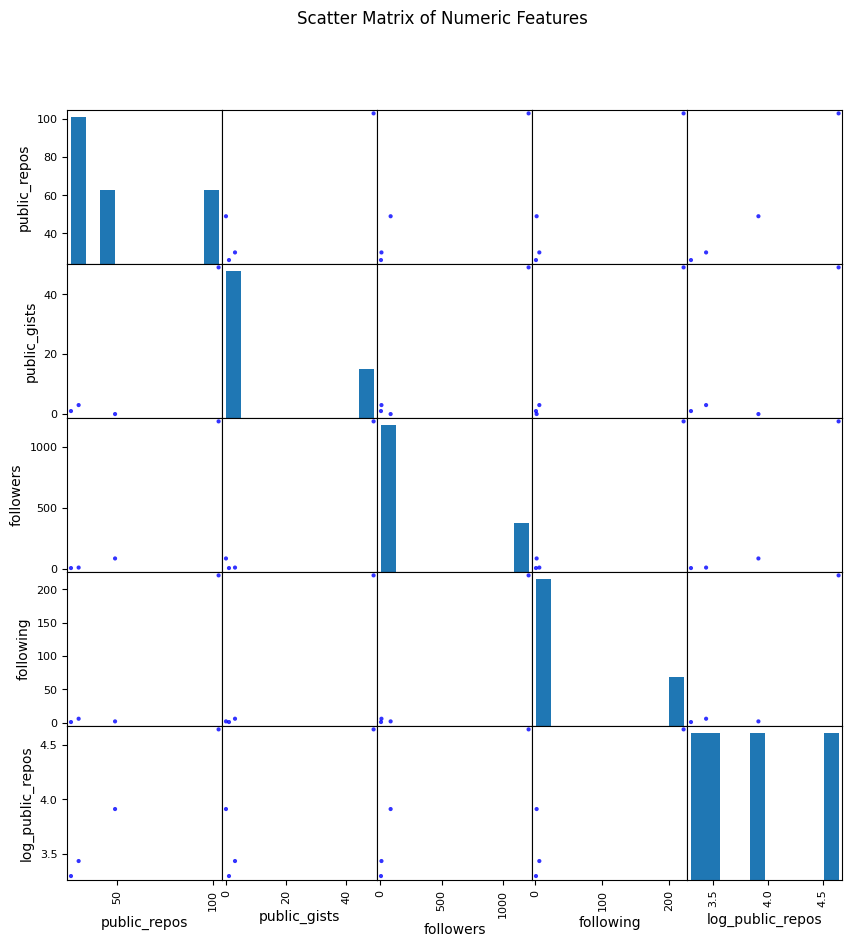

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
data = {
    "label": ["Human", "Human", "Human", "Bot"],
    "site_admin": [True, True, True, True],
    "company": [False, False, True, False],
    "public_repos": [26, 30, 103, 49],
    "public_gists": [1, 3, 49, 0],
    "followers": [5, 9, 1212, 84],
    "following": [1, 6, 221, 2]
}

# 创建 DataFrame
df = pd.DataFrame(data)

# 对数变换
df['log_public_repos'] = np.log1p(df['public_repos'])

# 1. 绘制条形图
plt.figure(figsize=(6, 4))
df['label'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# 2. 绘制堆积柱状图
bool_features = ['site_admin', 'company']
df_bool = df[bool_features].replace({True: 1, False: 0}).sum()
df_bool.plot(kind='bar', stacked=True, figsize=(6, 4), color='purple')
plt.title('Boolean Features Distribution')
plt.xlabel('Features')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# 3. 绘制直方图
plt.figure(figsize=(6, 4))
plt.hist(df['log_public_repos'], bins=10, color='green', alpha=0.7)
plt.title('Log Public Repos Distribution')
plt.xlabel('Log(Public Repos)')
plt.ylabel('Frequency')
plt.show()

# 4. 绘制散点图
plt.figure(figsize=(6, 4))
plt.scatter(df['public_repos'], df['followers'], color='red', alpha=0.7)
plt.title('Public Repos vs Followers')
plt.xlabel('Public Repos')
plt.ylabel('Followers')
plt.grid(True)
plt.show()

# 5. 绘制散点矩阵
numeric_features = ['public_repos', 'public_gists', 'followers', 'following', 'log_public_repos']
scatter_matrix(df[numeric_features], figsize=(10, 10), alpha=0.8, diagonal='hist', color='blue')
plt.suptitle('Scatter Matrix of Numeric Features')
plt.show()



6.使用Seaborn绘制图表
    绘制箱线图：展示不同label类别下log_followers的分布。
    绘制成对图：展示不同特征之间的成对关系，并根据label分类。
    绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
    绘制小提琴图：展示label与log_followers之间的分布差异。

Initial columns: Index(['label', 'public_repos', 'public_gists', 'followers', 'following'], dtype='object')
Columns after log transformation: Index(['label', 'public_repos', 'public_gists', 'followers', 'following',
       'log_public_repos', 'log_public_gists', 'log_followers',
       'log_following'],
      dtype='object')


/var/folders/f2/pss60fws0n1cdzh4q9cclq_80000gn/T/ipykernel_97540/3609133642.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="log_followers", data=df, palette="Set2")


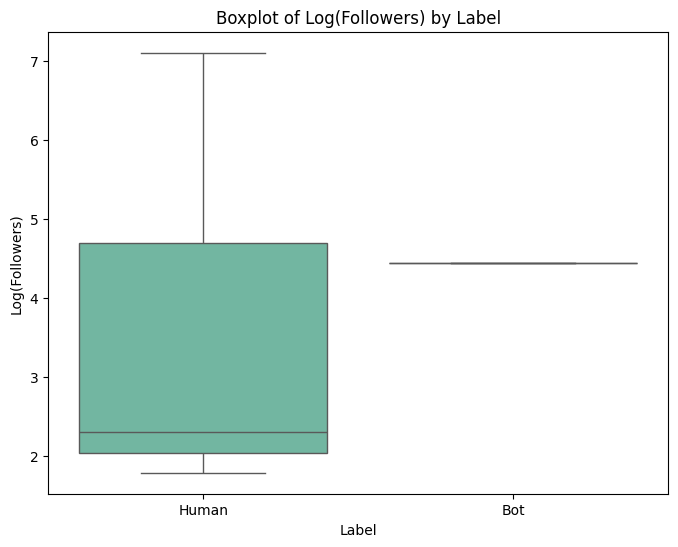

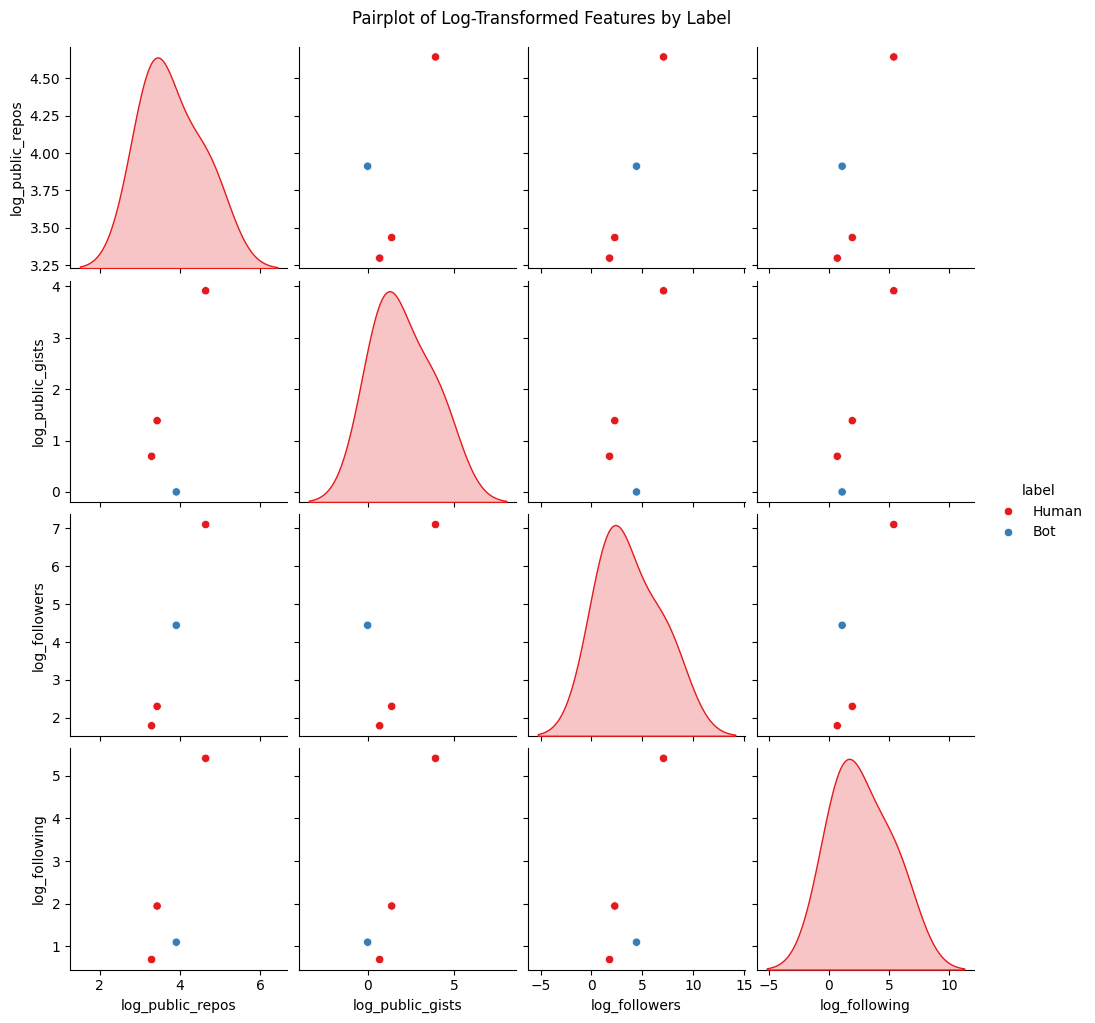

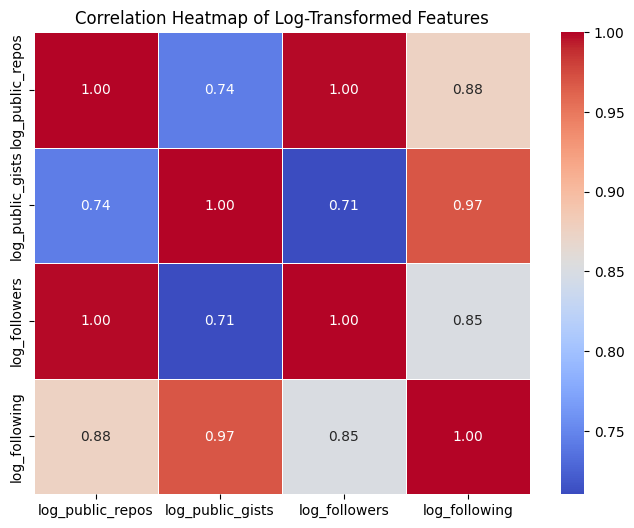

/var/folders/f2/pss60fws0n1cdzh4q9cclq_80000gn/T/ipykernel_97540/3609133642.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="label", y="log_followers", data=df, palette="Pastel1")


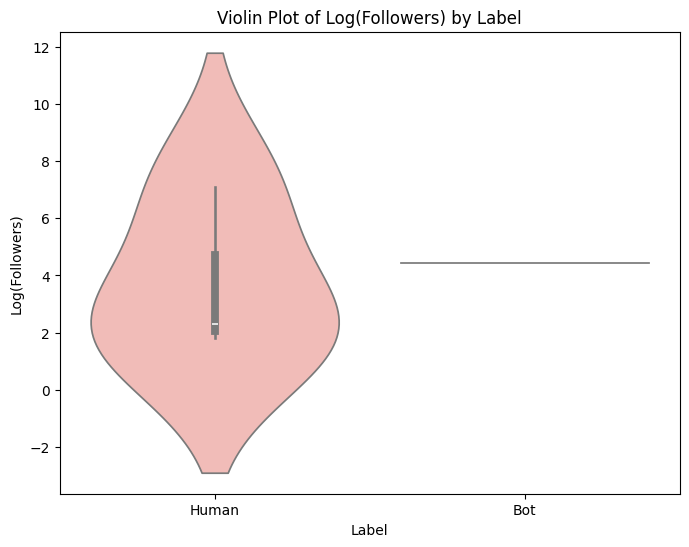

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 示例数据
data = {
    "label": ["Human", "Human", "Human", "Bot"],
    "public_repos": [26, 30, 103, 49],
    "public_gists": [1, 3, 49, 0],
    "followers": [5, 9, 1212, 84],
    "following": [1, 6, 221, 2]
}

# 创建 DataFrame
df = pd.DataFrame(data)

# 检查数据框的列名
print("Initial columns:", df.columns)

# 对数变换
try:
    df['log_public_repos'] = np.log1p(df['public_repos'])
    df['log_public_gists'] = np.log1p(df['public_gists'])
    df['log_followers'] = np.log1p(df['followers'])
    df['log_following'] = np.log1p(df['following'])
except KeyError as e:
    print("KeyError:", e)

# 检查是否成功生成列
print("Columns after log transformation:", df.columns)

# 确保所有数值型列存在
required_columns = ["log_public_repos", "log_public_gists", "log_followers", "log_following", "label"]
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # 提取数值型特征和标签列
    df_numeric = df[required_columns].dropna()  # 删除缺失值

    # 1. 绘制箱线图
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="label", y="log_followers", data=df, palette="Set2")
    plt.title("Boxplot of Log(Followers) by Label")
    plt.xlabel("Label")
    plt.ylabel("Log(Followers)")
    plt.show()

    # 2. 绘制成对图
    sns.pairplot(df_numeric, vars=required_columns[:-1], hue="label", palette="Set1", diag_kind="kde")
    plt.suptitle("Pairplot of Log-Transformed Features by Label", y=1.02)
    plt.show()

    # 3. 绘制热图
    correlation_matrix = df_numeric[required_columns[:-1]].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap of Log-Transformed Features")
    plt.show()

    # 4. 绘制小提琴图
    plt.figure(figsize=(8, 6))
    sns.violinplot(x="label", y="log_followers", data=df, palette="Pastel1")
    plt.title("Violin Plot of Log(Followers) by Label")
    plt.xlabel("Label")
    plt.ylabel("Log(Followers)")
    plt.show()


·使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

In [6]:
import pandas as pd
from ydata_profiling import ProfileReport


# 示例数据
data = {
    "label": ["Human", "Human", "Human", "Bot"],
    "public_repos": [26, 30, 103, 49],
    "public_gists": [1, 3, 49, 0],
    "followers": [5, 9, 1212, 84],
    "following": [1, 6, 221, 2]
}

# 创建 DataFrame
df = pd.DataFrame(data)

# 生成 pandas_profiling 报告
profile = ProfileReport(df, title="Interactive Data Analysis Report", explorative=True)

# 保存为 HTML 文件
profile.to_file("data_analysis_report.html")

# 在 Notebook 中直接显示报告（如果在 Jupyter Notebook 环境下）
profile.to_notebook_iframe()


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 521.10it/s]
